In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# move into project directory
repo_name = "UMass-CS670-Project"
%cd /content/drive/MyDrive/UMass-Courses/Semester-2/CS670/$repo_name
!ls

/content/drive/MyDrive/UMass-Courses/Semester-2/CS670/UMass-CS670-Project
common	datautils    get_dataset.sh	      Index.ipynb  models     SINet.ipynb
data	experiments  github-repo-clone.ipynb  index.py	   README.md


In [ ]:
# set up environment
# comment out if not required
'''
!pip3 install torch torchvision torchaudio
!pip install matplotlib numpy pandas pyyaml opencv-python
'''

'\n!pip3 install torch torchvision torchaudio\n!pip install matplotlib numpy pandas pyyaml opencv-python\n'

In [ ]:
# this cell is for downloading data.
# as of yet data is not hosted and is available in the private data folder
# uncomment the lines below  to download the data

import os

!pip install gdown

data_dir="data"

if not(os.path.exists("./data")):
    !gdown https://drive.google.com/uc?id=18oBjWeuw5qAq4HG_jZdjUHas4APy-KJE&export=download
    os.mkdir("data")
    #echo 'Downloaded data! Unzipping to data folder'
    !unzip -qq -d ./$data_dir ./COD10K-v3.zip
    os.rename("./COD10K-v3.zip", "./data/COD10K-v3.zip")
else:
    print("\nThe data directory exists!")


The data directory exists!


In [3]:
# setup some imports
from datautils.datareader import read_data
from datautils.dataset import COD10KDataset
from torch.utils.data import DataLoader
import random
import numpy as np
import torch
import argparse
from tqdm import tqdm
from torchvision.io import read_image

from experiments.style_transfer import style_transfer
from common.visualizer import layer_visualizer

In [24]:
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

parser = argparse.ArgumentParser()
parser.add_argument('--batch_size', type = int, default = 1)
parser.add_argument('--model_name', type=str, default='vgg')
parser.add_argument('--lr', type=float, default=0.08)
parser.add_argument('--max_iter', type=int, default=100)
parser.add_argument('--content_size', type=int, default=256)
parser.add_argument('--style_size', type=int, default=512)
args = parser.parse_args(args=[])

In [7]:
#img = read_image('./data/Mini-Set/butterfly-image.jpg')
img = read_image('./data/Textures/tree-bark.jpg')
print(img.size())
layer_visualizer(img, args)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
def run_style_transfer_pipeline(args):
    pos_data_paths = read_data('Train')

    dataset = COD10KDataset(pos_data_paths)
    dataloader = DataLoader(dataset, batch_size = args.batch_size)

    '''
    for i_batch, batch in enumerate(dataloader):
        style_transfer(batch['img'],
            (1, 4, 6, 7),
            3,
            6e-2,
            (2000, 512, 12, 1),
            6e-2,
            args)
    '''
    if torch.cuda.is_available():
        dtype = torch.cuda.FloatTensor
    else:
        dtype = torch.FloatTensor

    style_img = read_image('./data/Textures/snow.jpg').type(dtype)
    #style_img = read_image('./data/Textures/tree-bark.jpg').type(dtype)
    #style_img = read_image('./data/Textures/moss.jpg').type(dtype)
    content_img = read_image('./data/Mini-Set/butterfly-image.jpg').type(dtype)
    style_transfer(content_img,
            style_img,
            [0, 2, 5, 14, 23],
            21,
            1e-4,
            [0.5]*5,
            1e-5,
            args)

img sizes torch.Size([3, 360, 540]) torch.Size([3, 677, 849])
Iteration 0
Losses:  631.733642578125 5.16153621673584 1158.6278076171875


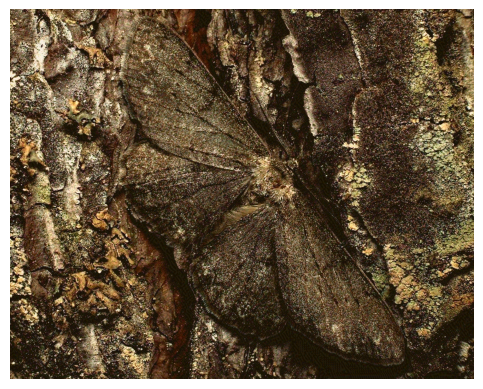

Iteration 99
Losses:  42.445980072021484 0.6312059164047241 110.20032501220703


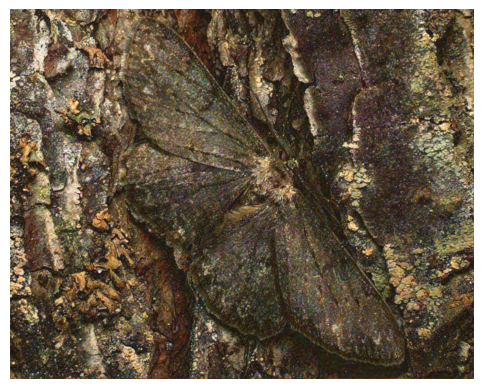




 Loss plots


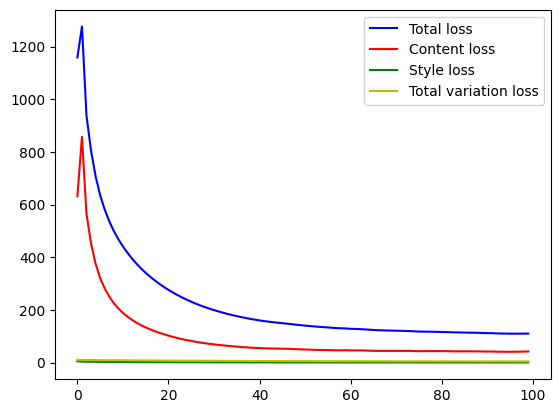

In [32]:
run_style_transfer_pipeline(args)